In [5]:
#importing the libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
#loading the dataset
credits = pd.read_csv("C:/Users/khushi shah/Desktop/recommender/tmdb_5000_credits.csv")
movies = pd.read_csv("C:/Users/khushi shah/Desktop/recommender/tmdb_5000_movies.csv")

#looking at the datset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [8]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
movies.shape


(4803, 20)

In [11]:
credits.shape

(4803, 4)

In [12]:
#merging credits and movies on the basis of id
credits.columns = ['id','title','cast','crew']
movies = movies.merge(credits, on="id")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
#dropping the unwanted columns and cleaning 
movies_cleaned=movies.drop(columns=['homepage','status','title_x','title_y','spoken_languages'])
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
#data cleaning

# Changing 'genres' column from json to string
movies_cleaned['genres'] = movies_cleaned['genres'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['genres']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the genre
    movies_cleaned.loc[index, 'genres'] = str(l1)
    
# Changing 'keywords' column from json to string
movies_cleaned['keywords'] = movies_cleaned['keywords'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['keywords']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'keywords'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_companies'] = movies_cleaned['production_companies'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_companies']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_companies'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_countries'] = movies_cleaned['production_countries'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_countries']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_countries'] = str(l1)
    
# Changing 'cast' column from json to string
movies_cleaned['cast'] = movies_cleaned['cast'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['cast']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'cast'] = str(l1)

#creating new column for director
movies_cleaned['crew']=movies_cleaned['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies_cleaned['crew']=movies_cleaned['crew'].apply(director)
movies_cleaned.rename(columns={'crew':'director'},inplace=True)

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [15]:
#formatting the data to make it easier to work with
movies_cleaned['genres']=movies_cleaned['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['genres']=movies_cleaned['genres'].str.split(',')

movies_cleaned['keywords']=movies_cleaned['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['keywords']=movies_cleaned['keywords'].str.split(',')

movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.split(',')

movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.split(',')

movies_cleaned['cast']=movies_cleaned['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['cast']=movies_cleaned['cast'].str.split(',')

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton


In [16]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
director                4773 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 712.9+ KB


In [17]:
#sorting on basis of number of votes and vote average
#calculating the weighted avg
"""
W = (Rv+Cm)/(v+m)
W = Weighted Rating
R = average for the movie(0 to 10) = Rating
v = number of votes for the movie
m = minimum votes required to be listed in Top 250
C = Mean vote across whole Report
"""
v = movies_cleaned['vote_count']
R = movies_cleaned['vote_average']
C = movies_cleaned['vote_average'].mean()
m = movies_cleaned['vote_count'].quantile(0.80)    # Movies > 80th percentile votes
movies_cleaned['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.116845
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.758257
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.263305
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.456523
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.097567


In [18]:
sorted_ranking = movies_cleaned.sort_values('weighted_avg', ascending=False)
sorted_ranking

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
1881,25000000,"[Drama, Crime]",278,"[prison, corruption, policebrutality, prisonce...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,[CastleRockEntertainment],[UnitedStatesofAmerica],1994-09-23,28341469,142.0,Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[TimRobbins, MorganFreeman, BobGunton, ClancyB...",Frank Darabont,8.248353
662,63000000,[Drama],550,"[supportgroup, dualidentity, nihilism, rageand...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[RegencyEnterprises, Fox2000Pictures, TaurusFi...","[Germany, UnitedStatesofAmerica]",1999-10-15,100853753,139.0,Mischief. Mayhem. Soap.,8.3,9413,"[EdwardNorton, BradPitt, MeatLoaf, JaredLeto, ...",David Fincher,8.096134
3337,6000000,"[Drama, Crime]",238,"[italy, loveatfirstsight, lossoffather, patria...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[ParamountPictures, AlfranProductions]",[UnitedStatesofAmerica],1972-03-14,245066411,175.0,An offer you can't refuse.,8.4,5893,"[MarlonBrando, AlPacino, JamesCaan, RichardS.C...",Francis Ford Coppola,8.077404
3232,8000000,"[Thriller, Crime]",680,"[transporter, brothel, drugdealer, boxer, mass...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[MiramaxFilms, ABandApart, JerseyFilms]",[UnitedStatesofAmerica],1994-10-08,213928762,154.0,Just because you are a character doesn't mean ...,8.3,8428,"[JohnTravolta, SamuelL.Jackson, UmaThurman, Br...",Quentin Tarantino,8.074738
65,185000000,"[Drama, Action, Crime, Thriller]",155,"[dccomics, crimefighter, secretidentity, scare...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[DCComics, LegendaryPictures, WarnerBros., DCE...","[UnitedKingdom, UnitedStatesofAmerica]",2008-07-16,1004558444,152.0,Why So Serious?,8.2,12002,"[ChristianBale, HeathLedger, AaronEckhart, Mic...",Christopher Nolan,8.044250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,100000000,"[Action, Crime]",314,"[whiterussian, sex, dccomics, beauty, sexism, ...",en,Catwoman,Liquidated after discovering a corporate consp...,32.271938,"[VillageRoadshowPictures, DiNoviPictures, Warn...",[UnitedStatesofAmerica],2004-07-22,82102379,104.0,CATch her in IMAX,4.2,808,"[HalleBerry, BenjaminBratt, SharonStone, Lambe...",Pitof,5.226248
3746,4000000,[Thriller],241251,"[malenudity, femalenudity, sex, adultery, infi...",en,The Boy Next Door,A recently cheated on married woman falls for ...,24.161735,"[UniversalPictures, NuyoricanProductions, Blum...",[UnitedStatesofAmerica],2015-01-23,52425855,91.0,A Moment She Couldn't Resist. An Obsession He ...,4.1,1022,"[JenniferLopez, RyanGuzman, IanNelson, JohnCor...",Rob Cohen,5.063681
1652,100000000,"[Action, Adventure, Fantasy, ScienceFiction, T...",14164,"[karate, superhero, revenge, dragon, duringcre...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",[UnitedStatesofAmerica],2009-04-01,0,85.0,The legend comes to life.,2.9,462,"[ChowYun-fat, JustinChatwin, JoonPark, JamieCh...",James Wong,5.053299
210,125000000,"[Action, Crime, Fantasy]",415,"[doublelife, dccomics, dualidentity, crimefigh...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"[PolyGramFilmedEntertainment, WarnerBros.]","[UnitedKingdom, UnitedStatesofAmerica]",1997-06-20,238207122,125.0,Strength. Courage. Honor. And loyalty.,4.2,1418,"[GeorgeClooney, ""ChrisODonnell"", ArnoldSchwarz...",Joel Schumacher,4.962731


In [19]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.248353,136.747729
662,Fight Club,9413,8.3,8.096134,146.757391
3337,The Godfather,5893,8.4,8.077404,143.659698
3232,Pulp Fiction,8428,8.3,8.074738,121.463076
65,The Dark Knight,12002,8.2,8.044250,187.322927
809,Forrest Gump,7927,8.2,7.972814,138.133331
96,Inception,13752,8.1,7.969290,167.583710
95,Interstellar,10867,8.1,7.937399,724.247784
1990,The Empire Strikes Back,5879,8.2,7.904757,78.517830
1818,Schindler's List,4329,8.3,7.900080,104.469351


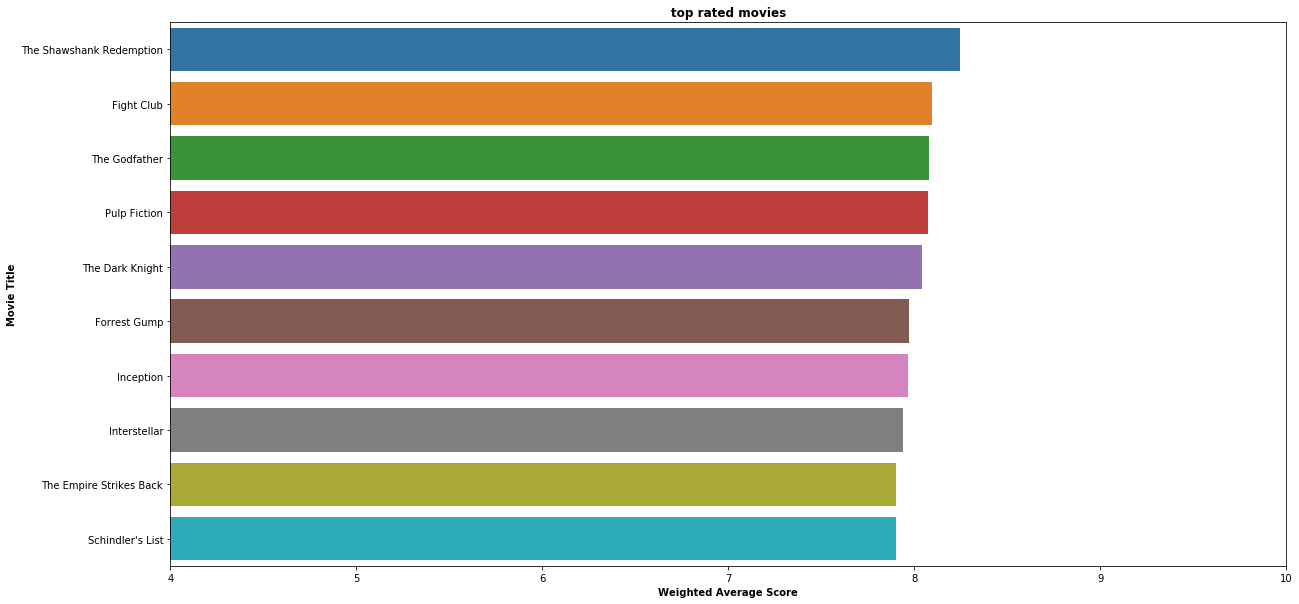

In [20]:
weight_avg = sorted_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = weight_avg['weighted_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title("top rated movies", weight="bold")
plt.xlabel("Weighted Average Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [21]:
#sorting on basis of popularity
popular_movies=sorted_ranking.sort_values('popularity',ascending=False)
popular_movies.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[UniversalPictures, IlluminationEntertainment]",[UnitedStatesofAmerica],2015-06-17,1156730962,91.0,"Before Gru, they had a history of bad bosses",6.4,4571,"[SandraBullock, JonHamm, MichaelKeaton, Alliso...",Kyle Balda,6.346682
95,165000000,"[Adventure, Drama, ScienceFiction]",157336,"[savingtheworld, artificialintelligence, fathe...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[ParamountPictures, LegendaryPictures, WarnerB...","[Canada, UnitedStatesofAmerica, UnitedKingdom]",2014-11-05,675120017,169.0,Mankind was born on Earth. It was never meant ...,8.1,10867,"[MatthewMcConaughey, JessicaChastain, AnneHath...",Christopher Nolan,7.937399
788,58000000,"[Action, Adventure, Comedy]",293660,"[antihero, mercenary, marvelcomic, superhero, ...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[TwentiethCenturyFoxFilmCorporation, MarvelEnt...",[UnitedStatesofAmerica],2016-02-09,783112979,108.0,Witness the beginning of a happy ending,7.4,10995,"[RyanReynolds, MorenaBaccarin, EdSkrein, T.J.M...",Tim Miller,7.295221
94,170000000,"[Action, ScienceFiction, Adventure]",118340,"[marvelcomic, spaceship, space, outerspace, or...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[MarvelStudios, MovingPictureCompany(MPC), Bul...","[UnitedKingdom, UnitedStatesofAmerica]",2014-07-30,773328629,121.0,All heroes start somewhere.,7.9,9742,"[ChrisPratt, ZoeSaldana, DaveBautista, VinDies...",James Gunn,7.738202
127,150000000,"[Action, Adventure, ScienceFiction, Thriller]",76341,"[future, chase, post-apocalyptic, dystopia, au...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[VillageRoadshowPictures, KennedyMillerProduct...","[Australia, UnitedStatesofAmerica]",2015-05-13,378858340,120.0,What a Lovely Day.,7.2,9427,"[TomHardy, CharlizeTheron, NicholasHoult, Hugh...",George Miller,7.097843
28,150000000,"[Action, Adventure, ScienceFiction, Thriller]",135397,"[monster, dna, tyrannosaurusrex, velociraptor,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[UniversalStudios, AmblinEntertainment, Legend...",[UnitedStatesofAmerica],2015-06-09,1513528810,124.0,The park is open.,6.5,8662,"[ChrisPratt, BryceDallasHoward, IrrfanKhan, ""V...",Colin Trevorrow,6.459402
199,140000000,"[Adventure, Fantasy, Action]",22,"[exoticisland, blacksmith, eastindiatradingcom...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[WaltDisneyPictures, JerryBruckheimerFilms]",[UnitedStatesofAmerica],2003-07-09,655011224,143.0,Prepare to be blown out of the water.,7.5,6985,"[JohnnyDepp, GeoffreyRush, OrlandoBloom, Keira...",Gore Verbinski,7.330265
82,170000000,"[ScienceFiction, Action, Drama, Thriller]",119450,"[leader, colony, post-apocalyptic, dystopia, f...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"[IngeniousMedia, CherninEntertainment, TSGEnte...",[UnitedStatesofAmerica],2014-06-26,710644566,130.0,One last chance for peace.,7.3,4410,"[AndySerkis, JasonClarke, GaryOldman, KeriRuss...",Matt Reeves,7.084519
200,125000000,"[ScienceFiction, Adventure, Thriller]",131631,"[resistance, post-apocalyptic, dystopia, war, ...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"[Lionsgate, ColorForce]",[UnitedStatesofAmerica],2014-11-18,752100229,123.0,Fire burns brighter in the darkness,6.6,5584,"[JenniferLawrence, JoshHutcherson, LiamHemswor...",Francis Lawrenc

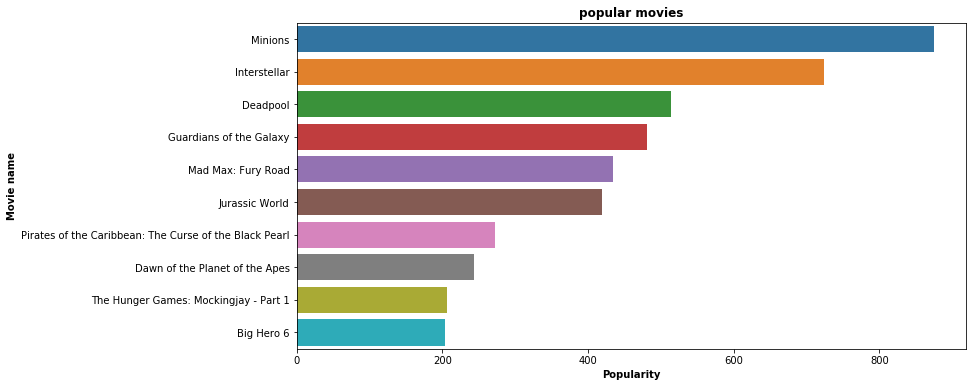

In [22]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popular_movies['popularity'].head(10),y=popular_movies['original_title'].head(10),data=popular_movies)
plt.xlabel("Popularity",weight="bold")
plt.ylabel("Movie name",weight="bold")
plt.title("popular movies",weight="bold")
plt.show()

In [23]:
#content based filtering (using TMDB 5000 Movie Dataset)

movies['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Replacing NaN with an empty string
movies['overview'] = movies['overview'].fillna('')
#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])
tfidf_matrix.shape

# There are 20,978 different words were used to describe the 4803 movies in our dataset!

(4803, 20978)

In [28]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar movies
    sim_scores = sim_scores[1:21]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['original_title'].iloc[movie_indices]

In [29]:
get_recommendations('The Avengers')

7                Avengers: Age of Ultron
3144                             Plastic
1715                             Timecop
4124                  This Thing of Ours
3311               Thank You for Smoking
3033                       The Corruptor
588      Wall Street: Money Never Sleeps
2136          Team America: World Police
1468                        The Fountain
1286                         Snowpiercer
256                            Allegiant
1197                   Horrible Bosses 2
1161                  The Social Network
2433    Superman IV: The Quest for Peace
2646                      Silent Trigger
227                       Knight and Day
2097                   Are We There Yet?
602            Ballistic: Ecks vs. Sever
4620                Fighting Tommy Riley
290                    The Expendables 2
Name: original_title, dtype: object

In [30]:
get_recommendations('The Dark Knight Rises')


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
879                         Law Abiding Citizen
2193                       Secret in Their Eyes
1398                                  Max Payne
2416                                    Beastly
1068       The Hitchhiker's Guide to the Galaxy
979                         Free State of Jones
1202                               Legal Eagles
790                             American Sniper
2274                                   Survivor
1766                                    Case 39
Name: original_title, dtype: object

In [31]:
#collaborative filtering recommender (using movielens-20m-dataset)
#loading the dataset
movies = pd.read_csv("C:/Users/khushi shah/Desktop/recommender/movies.csv")
ratings = pd.read_csv("C:/Users/khushi shah/Desktop/recommender/ratings.csv")

In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#filling the NaN values with 0
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#counting no of users that voted a movie
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')

In [37]:
#counting no of movies a user has voted 
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

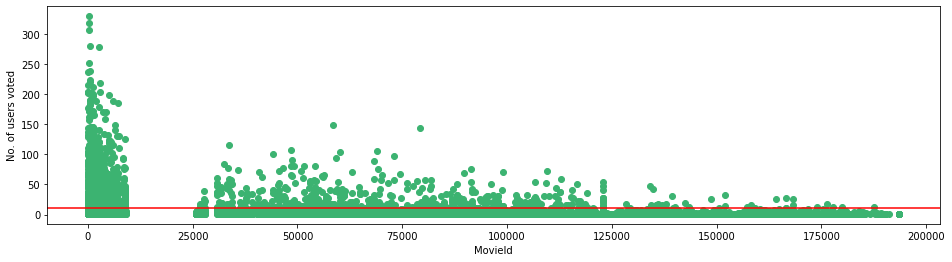

In [38]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
#to see movies which were rated by more than 10 users
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

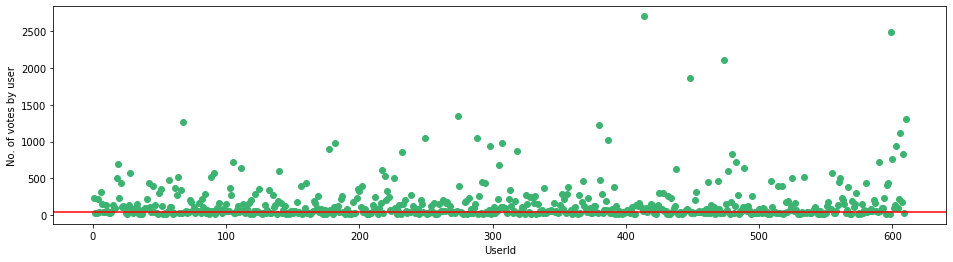

In [39]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [40]:
#only considering movies which were voted by more than 50 people to get accurate prediction
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#sparse matrix identify
from scipy.sparse import csr_matrix
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [43]:
#training and fitting the model
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [56]:
#Function that takes in movie title as input and outputs recommended movies
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [57]:
#prints the title and how alike the recommended movie is
get_movie_recommendation('Assassins')

,Title,Distance
1,Mary Shelley's Frankenstein (Frankenstein) (1994),0.678334
2,Junior (1994),0.676466
3,Batman Forever (1995),0.676066
4,Airheads (1994),0.674667
5,Broken Arrow (1996),0.663012
6,Judge Dredd (1995),0.658129
7,Die Hard: With a Vengeance (1995),0.646724
8,"Prophecy, The (1995)",0.632134
9,Beverly Hills Cop III (1994),0.630030
10,Milk Money (1994),0.612292


In [58]:
get_movie_recommendation('Jumanji')

,Title,Distance
1,Casper (1995),0.474253
2,Stargate (1994),0.469654
3,"Nightmare Before Christmas, The (1993)",0.462612
4,Home Alone (1990),0.443432
5,Beauty and the Beast (1991),0.435007
6,Aladdin (1992),0.425428
7,Jurassic Park (1993),0.420563
8,Mrs. Doubtfire (1993),0.416164
9,"Mask, The (1994)",0.413743
10,"Lion King, The (1994)",0.377013


In [ ]:
#we can see it's working nicely as the movies recommended are similar to the movie asked for(children friendly movies) 